In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_stat_kulina = pd.read_csv('statistics_dataset_kulina.csv')

In [3]:
df_stat_kulina

,id,order_date,user_id,product_id,quantity
0,24,1/3/2019,62746,1,1
1,8989,1/1/2019,53424,28,1
2,8990,1/1/2019,53424,28,1
3,8991,1/1/2019,53424,28,1
4,8992,1/1/2019,53424,28,1
...,...,...,...,...,...
532384,636445,12/27/2019,52375,77,1
532385,636446,12/27/2019,52375,77,1
532386,636451,12/27/2019,118653,96,1
532387,636452,12/27/2019,118653,821,1


In [4]:
df_stat_kulina.describe()

,id,user_id,product_id,quantity
count,532389.000000,532389.000000,532389.000000,532389.000000
mean,330533.671979,81136.665138,123.439479,1.205222
std,179663.589930,29547.174675,166.035861,2.293668
min,24.000000,6.000000,1.000000,-1.000000
25%,175649.000000,63775.000000,20.000000,1.000000
50%,333055.000000,85328.000000,65.000000,1.000000
75%,488630.000000,102872.000000,169.000000,1.000000
max,636453.000000,139605.000000,876.000000,315.000000


In [5]:
df_stat_kulina_anomaly = df_stat_kulina[df_stat_kulina['quantity'] < 0]

In [6]:
df_stat_kulina_anomaly

,id,order_date,user_id,product_id,quantity
209267,267632,6/23/2019,101113,209,-1
209268,267633,6/23/2019,101113,209,-1
209269,267634,6/23/2019,101113,209,-1
209270,267635,6/23/2019,101113,209,-1
209271,267636,6/23/2019,101113,209,-1


Nilai minus pada quantity dengan user_id dan order_date yang sama bisa diindikasikan ini merupakan:

1. Refund / Return, di mana catering dikembalikan
2. Cancel Order
3. Error system duplicate data

Karena data yang memiliki quantity < 0 ada sebanyak 5 row saja, maka data dapat dihapus

In [7]:
df_clean = df_stat_kulina[df_stat_kulina['quantity'] > 0]

In [8]:
user_quantity = df_clean.groupby('user_id')['quantity'].sum().reset_index()
display(user_quantity.sort_values(by='quantity', ascending=False).head())

,user_id,quantity
6014,67296,4058
21072,107875,4020
8773,79828,2696
2797,42016,2691
13830,89079,2576


In [9]:
user_quantity['quantity'].describe()

,quantity
count,28068.000000
mean,22.860624
std,66.314291
min,1.000000
25%,4.000000
50%,8.000000
75%,23.000000
max,4058.000000


In [10]:
# Statistik Deskriptif

print("Statistik Deskriptif: ")
print(user_quantity.describe(), "\n")
print(f"Skewness: {user_quantity['quantity'].skew()}")
print(f"Kurtosis: {user_quantity['quantity'].kurtosis()}")

Statistik Deskriptif: 
             user_id      quantity
count   28068.000000  28068.000000
mean    87033.767850     22.860624
std     29805.759949     66.314291
min         6.000000      1.000000
25%     72348.250000      4.000000
50%     89434.500000      8.000000
75%    107723.250000     23.000000
max    139605.000000   4058.000000 

Skewness: 28.89945781768341
Kurtosis: 1358.4697699369915


Analisa Statistik Deskriptif:

1. Skewness
Dari Skewness kita dapat melihat di angka (28.899). Hal ini menunjukkan sebaran data akan cenderung condong ke kanan. Artinya, ekor distribusi di kanan itu sangat panjang, yang menandakan banyaknya user yang melakukan order dalam jumlah kecil sebagai mayoritas, namun terdapat segelintir orang order dalam jumlah yang sangat besar (max: 4058).

2. Kurtosis
Dapat dilihat bahwa kurtosis dari data ini adalah 1358. Hal tersebut menandakan bahwa nilai kurtosis sangat tinggi yang artinya data memiliki puncak sangat tinggi dan banyak outliers yang ekstrem.

3. Median - Mean
Dengan nilai median (8) lebih kecil daripada mean (22.86), rata-rata tertarik ke atas oleh segelintir user yang memiliki kuantitas order yang cukup tinggi. Padahal, jika dilihat dari median, 50% user hanya membeli 8 unit atau kurang.

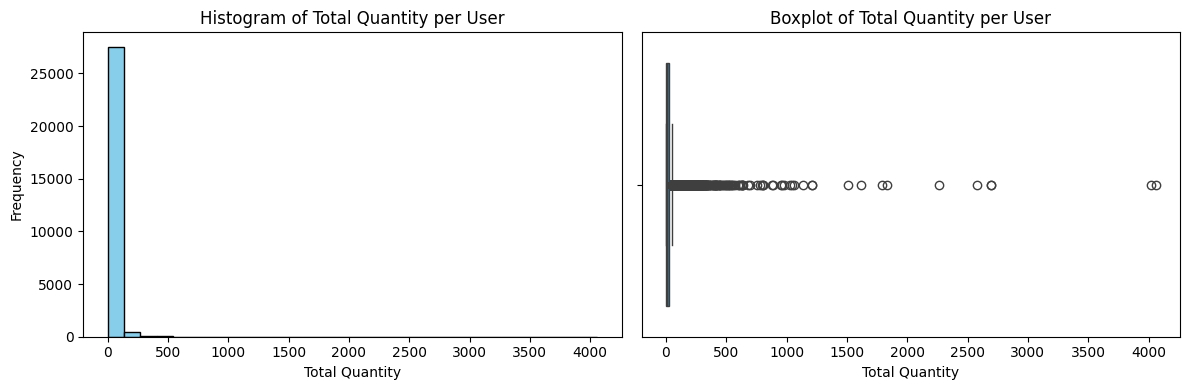

In [11]:
# Plotting
plt.figure(figsize=(12, 4))

# Buat visualisasi histogram
plt.subplot(1, 2, 1)
plt.hist(user_quantity['quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Quantity per User')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')

# Buat visualisasi boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=user_quantity['quantity'])
plt.xlabel('Total Quantity')
plt.title('Boxplot of Total Quantity per User')

plt.tight_layout()
plt.show()

In [12]:
print('Jumlah total users: ', len(user_quantity))
print('Users dengan quantity lebih dari median: ', (user_quantity['quantity'] > user_quantity['quantity'].median()).sum())

Jumlah total users:  28068
Users dengan quantity lebih dari median:  13945
